In [338]:
from PIL import Image  
import numpy as np

In [339]:
def rysuj_ramki(w, h, grub, kolor_poczatkowy, kolor_dodanie):
    # Funkcja tworzy ramki w odcieniach szarości
    # Kolory ramek stopniowo zwiększają jasność, aż do wartości 255
    arr = np.zeros((h, w), dtype=np.uint8)
    kolor = kolor_poczatkowy
    ile_ramek = min(h // (2 * grub), w // (2 * grub))
    
    for k in range(ile_ramek):
        # Górna i dolna ramka
        for y in range(k * grub, w - k * grub):
            for g in range(grub):
                arr[k * grub + g, y] = kolor  # Górna ramka
                arr[h - k * grub - g - 1, y] = kolor  # Dolna ramka
        
        # Lewa i prawa ramka
        for x in range(k * grub, h - k * grub):
            for g in range(grub):
                arr[x, k * grub + g] = kolor  # Lewa ramka
                arr[x, w - k * grub - g - 1] = kolor  # Prawa ramka
        
        # Zwiększ kolor, ale nie przekraczaj 255
        kolor = min(255, kolor + kolor_dodanie)

    return Image.fromarray(arr)




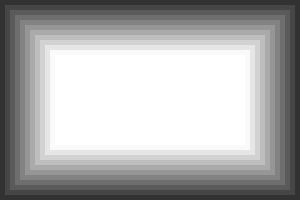

In [340]:

ramki = rysuj_ramki(300, 200, 5, 50, 20)  

ramki.save('ramki_szare.png', 'png') 
ramki

In [341]:
def rysuj_pasy_pionowe_szare(w, h, grub, kolor_poczatkowy, kolor_dodanie):
    arr = np.zeros((h, w), dtype=np.uint8)
    ile_pasow = w // grub 
    kolor = kolor_poczatkowy  

    for k in range(ile_pasow):
        for g in range(grub):
            if k * grub + g < w:
                arr[:, k * grub + g] = kolor

        if kolor + kolor_dodanie > 255:
            kolor = kolor_poczatkowy 
        else:
            kolor += kolor_dodanie 

    return Image.fromarray(arr)

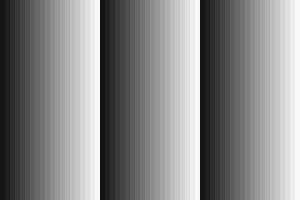

In [342]:

pasy_pionowe_szare = rysuj_pasy_pionowe_szare(300, 200, 5, 20,12)
pasy_pionowe_szare.save("pasy_pionowe_szare.png")
pasy_pionowe_szare

In [343]:

def negatyw(obraz):
    if obraz.mode == '1':
        negatyw_obraz = obraz.point(lambda p: 1 - p)

    elif obraz.mode == 'L':
        negatyw_obraz = obraz.point(lambda p: 255 - p)
    
    elif obraz.mode == 'RGB':
        tab = np.array(obraz)
        negatyw_tab = 255 - tab  # Negatyw dla każdego kanału R, G, B
        negatyw_obraz = Image.fromarray(negatyw_tab)
    
    else:
        raise ValueError(f"Nieobsługiwany tryb obrazu: {obraz.mode}")
    return negatyw_obraz

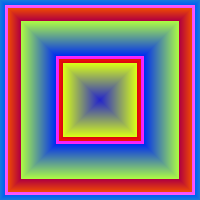

In [344]:
def rysuj_ramki_kolorowe(w, kolor, zmiana_koloru_r, zmiana_koloru_g, zmiana_koloru_b):
    t = (w, w, 3)
    tab = np.zeros(t, dtype=np.uint8)
    kolor_r = kolor[0]
    kolor_g = kolor[1]
    kolor_b = kolor[2]
    z = w
    for k in range(int(w / 2)):
        for i in range(k, z - k):
            for j in range(k, z - k):
                tab[i, j] = [kolor_r, kolor_g, kolor_b]
        kolor_r = (kolor_r - zmiana_koloru_r) % 256
        kolor_g = (kolor_g - zmiana_koloru_g) % 256
        kolor_b = (kolor_b - zmiana_koloru_b) % 256
    return Image.fromarray(tab)


im_ramka_kolor = rysuj_ramki_kolorowe(200,[20,120,220],5,6,-5)
im_ramka_kolor

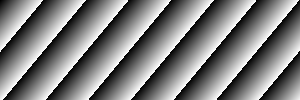

In [345]:
def rysuj_po_skosie_szare(h,w, a, b):  # formuła zmiany wartości elemntów tablicy a*i + b*j
    t = (h, w) # rysuje kwadratowy obraz
    tab = np.zeros(t, dtype=np.uint8)
    for i in range(h):
        for j in range(w):
            tab[i, j] = (a*i + b*j) % 256 
    return Image.fromarray(tab)


im_skos = rysuj_po_skosie_szare(100, 300, 5, 6)
im_skos

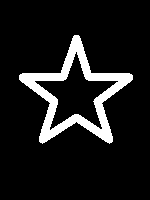

In [346]:

obraz_gwiazdka = Image.open("gwiazdka.bmp")
negatyw_gwiazdka = negatyw(obraz_gwiazdka)
negatyw_ramka_kolorowa = negatyw(im_ramka_kolor)
negatyw_skosny_szary = negatyw(im_skos)
negatyw_gwiazdka



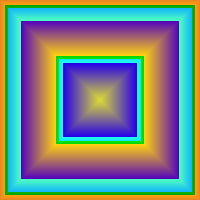

In [347]:
negatyw_ramka_kolorowa

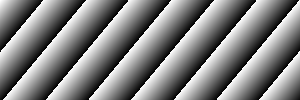

In [348]:
negatyw_skosny_szary

In [349]:
obraz_gwiazdka.save("gwiazdka_original.png")
negatyw_gwiazdka.save("gwiazdka_negatyw.png")

im_ramka_kolor.save("ramka_kolorowa_original.png")
negatyw_ramka_kolorowa.save("ramka_kolorowa_negatyw.png")

im_skos.save("obraz_skosny_szary_original.png")
negatyw_skosny_szary.save("obraz_skosny_szary_negatyw.png")

In [350]:
def koloruj_w_paski(obraz, grub, kolory):
    t_obraz = np.asarray(obraz.convert('L'))
    h, w = t_obraz.shape
    t = (h, w, 3)
    
    tab = np.ones(t, dtype=np.uint8) * 255 
    
    liczba_kolorow = len(kolory)
    for i in range(h):
        kolor = kolory[(i // grub) % liczba_kolorow]
        for j in range(w):
            if t_obraz[i, j] == 0: 
                tab[i, j] = kolor
    
    return Image.fromarray(tab)
obraz_inicialy = Image.open('iniciały.bmp')

obraz_paski = koloruj_w_paski(obraz_inicialy,5, [[255, 0, 0], [0, 255, 0], [0, 0, 255]])

inicjaly_jpg_path = "inicjaly_paski.jpg"
inicjaly_png_path = "inicjaly_paski.png"

obraz_paski.save(inicjaly_jpg_path, format='JPEG')
obraz_paski.save(inicjaly_png_path, format='PNG')

inicjaly_jpg_path, inicjaly_png_path


('inicjaly_paski.jpg', 'inicjaly_paski.png')